In [28]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
cvusa = pd.read_csv('cv-dev-usa.csv', parse_dates=["Date"], index_col="Date")


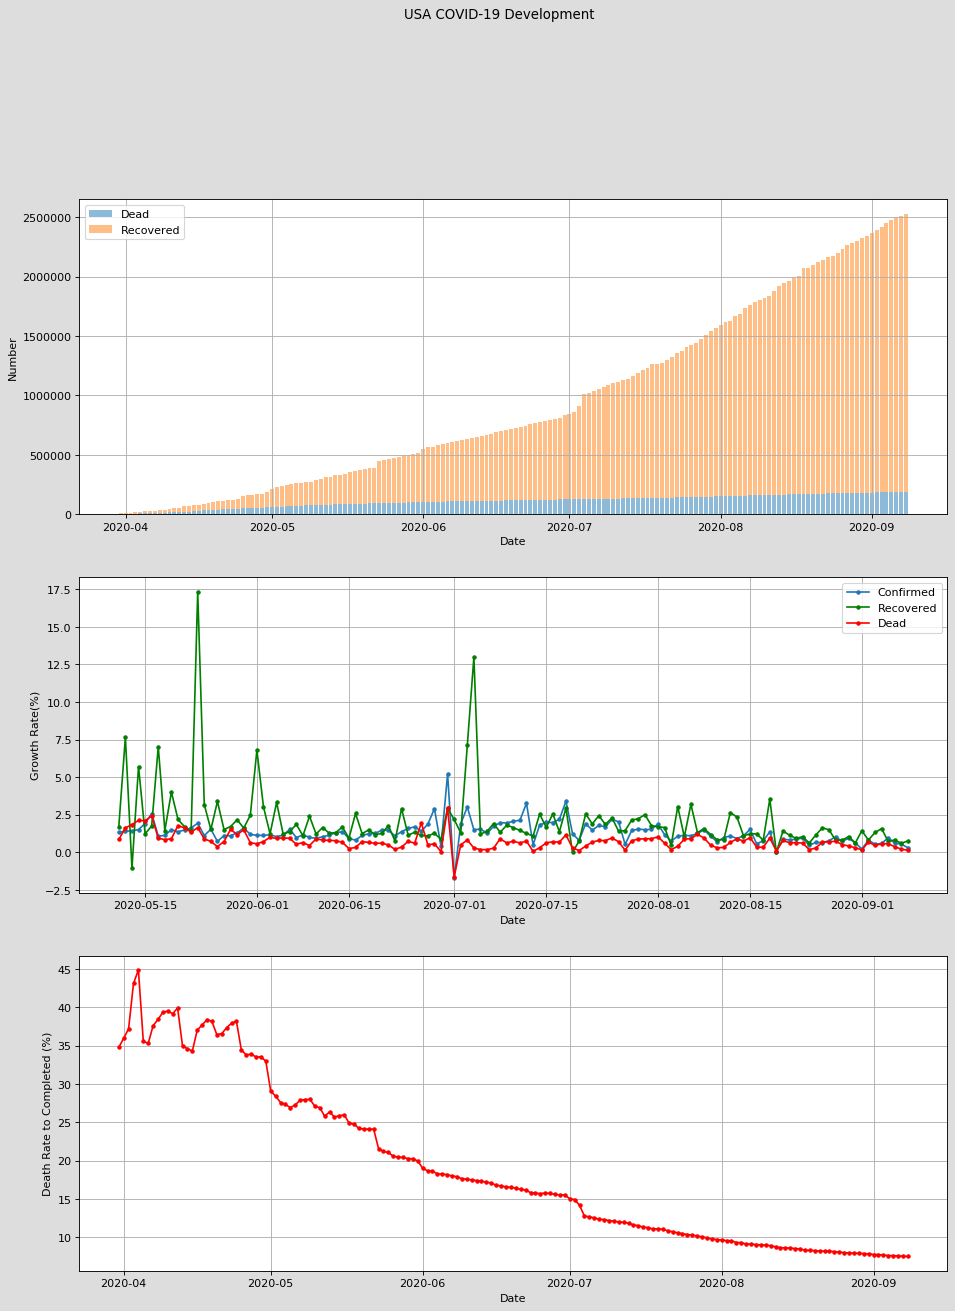

In [31]:


def growth_pcnt(ser):
    new = pd.Series(ser.iloc[1:].array)
    old = pd.Series(ser.iloc[:-1].array)
    delta = new - old
    return delta / old * 100
 

plt.figure(num=None, figsize=(14,24), dpi=80, facecolor='#dddddd', edgecolor='k')

dates = cvusa.index

dead = cvusa.Dead
recovered = cvusa.Recovered
confirmed = cvusa.Confirmed
total = cvusa.Dead + cvusa.Recovered
#
dates_dlt = pd.Series(dates[1:].array)

curr_row = 1
plt.subplot(4, 1, curr_row)

plt.bar(dates, dead, align='center', alpha=0.5)
plt.bar(dates, recovered, bottom=dead, align='center', alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Number")
plt.legend([ "Dead", "Recovered"])
plt.grid()
#
curr_row += 1
plt.subplot(4, 1, curr_row)
#
shift_days = 40
dtd = pd.Series(dates_dlt.iloc[shift_days:].array)

plt.plot(dtd, growth_pcnt(pd.Series(confirmed.iloc[shift_days:].array)), ".-")
plt.plot(dtd, growth_pcnt(pd.Sedates = pd.to_datetime(cvusa.Date)
ries(recovered.iloc[shift_days:].array)), ".-g")
plt.plot(dtd, growth_pcnt(pd.Series(dead.iloc[shift_days:].array)), ".-r")
plt.xlabel("Date")
plt.ylabel("Growth Rate(%)")
plt.legend(["Confirmed", "Recovered", "Dead"])
plt.grid()
#
curr_row += 1
plt.subplot(4, 1, curr_row)
#
death_pcnt = dead / total * 100.0
plt.plot(dates, death_pcnt, ".-r")
plt.xlabel("Date")
plt.ylabel("Death Rate to Completed (%)")
plt.grid()
#

plt.suptitle("USA COVID-19 Development")
plt.show()



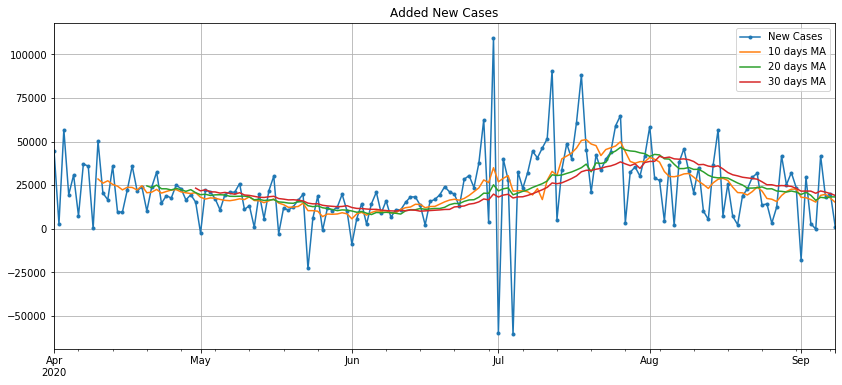

2020-08-30    32260.0
2020-08-31    23603.0
2020-09-01   -17711.0
2020-09-02    29487.0
2020-09-03     3007.0
2020-09-04     -185.0
2020-09-05    41881.0
2020-09-06    18312.0
2020-09-07    20166.0
2020-09-08     1023.0
dtype: float64

In [32]:
# import numpy as np
# from matplotlib import pyplot as plt
# import pandas as pd
# cvusa = pd.read_csv('cv-dev-usa.csv', parse_dates=True, index_col=0)

confirmed_new = (cvusa.Confirmed - cvusa.Confirmed.shift(1)).dropna()
dead_new = (cvusa.Dead - cvusa.Dead.shift(1)).dropna()
recovered_new = (cvusa.Recovered - cvusa.Recovered.shift(1)).dropna()


growth = pd.Series((confirmed_new - (dead_new + recovered_new)).array, index=dates_dlt)
growth

growth.plot(figsize=(14, 6), title="Added New Cases", legend=True, label="New Cases", style='.-')
growth.rolling(10).mean().plot(grid=True, legend=True, label="10 days MA")
growth.rolling(20).mean().plot(grid=True, legend=True, label="20 days MA")
growth.rolling(30).mean().plot(grid=True, legend=True, label="30 days MA")
plt.show()
growth.tail(10)


Correlation    83
dtype: int64


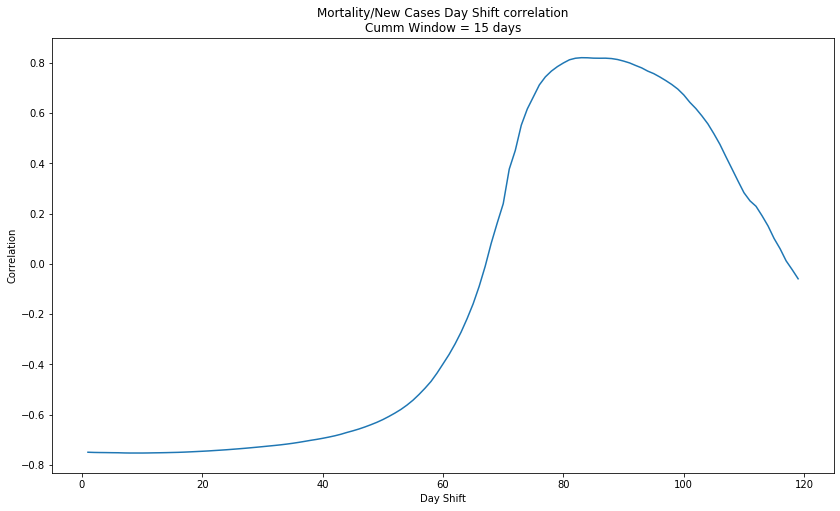

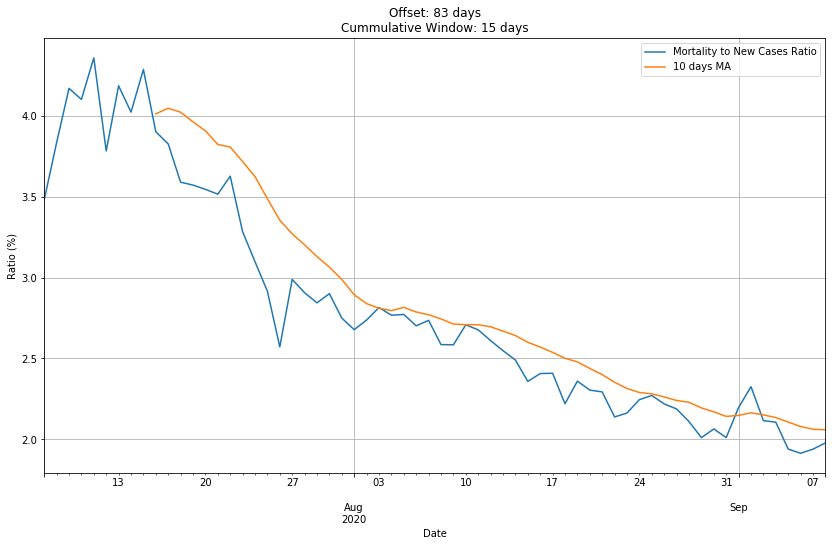

Date
2020-09-04    2.106421
2020-09-05    1.940289
2020-09-06    1.914756
2020-09-07    1.939878
2020-09-08    1.978752
dtype: float64


In [57]:
# New Cases -> Deathes Correlation
# import numpy as np
# from matplotlib import pyplot as plt
# import pandas as pd

# Mortality to confirmed after offsetDays and for cumm_wnd_days
def calcCorrelation(confirmed : pd.Series
                             , dead : pd.Series
                             , cumm_wnd_days : int
                             , days_shift : int):
    # accumulate total confirmed during that "cumm_wnd_days" days
    cumm_conf = (confirmed - confirmed.shift(cumm_wnd_days)).dropna().tshift(days_shift)

    # death accumulate for same windows but "offsetDays" later
    dead_shift = dead.shift(days_shift)
    cumm_dead = (dead_shift -  dead_shift.shift(cumm_wnd_days)).dropna()

    ratio = cumm_dead * 100 / cumm_conf
    return ratio.corr(cumm_conf) 


def mortalityToNewCasesRatio(confirmed : pd.Series
                             , dead : pd.Series
                             , cumm_wnd_days : int
                             , offset_days : int):
    # accumulate total confirmed during that "cummDaysWindow" days
    cumm_conf = confirmed - confirmed.shift(cumm_wnd_days)

    # death accumulate for same windows but "offset_days" later
    deadOffset = dead.shift(offset_days)
    cummDead = deadOffset -  deadOffset.shift(cumm_wnd_days)

    res = cummDead * 100 / cumm_conf
    return res

#     print(correlation.idxmax())
def correlation(confirmed : pd.Series
                          , dead : pd.Series
                          , cum_wnd_days: int):
    after_days_arr = range(1, 120)
    corr_arr = [calcCorrelation(confirmed, dead, cum_wnd_days, after_days) 
               for after_days in after_days_arr]
    return pd.DataFrame(data={'Correlation': corr_arr}, index=after_days_arr)
    
def plot_correlation_chart(corr : pd.DataFrame
                          , cum_wnd_days: int):
    corr.plot(figsize=(14, 8)
             , title=f"Mortality/New Cases Day Shift correlation\nCumm Window = {cum_wnd_days} days"
             , legend=False, label="Correlation") 
    plt.ylabel("Correlation")
    plt.xlabel("Day Shift")
    plt.show()
    
def plot_cases_mortality_chart(cvusa, **kwargs):
    cumm_wnd_days = kwargs["window_size"]
    days_shift = kwargs["offset_days"]
    maDays = kwargs["ma_days"] if "ma_days" in kwargs else 5

    conf = cvusa.Confirmed
    dead = cvusa.Dead
    ratio = mortalityToNewCasesRatio(conf
                                     , dead
                                     , cumm_wnd_days
                                    , days_shift).dropna()
    ratio.plot(title=f"Offset: {days_shift} days\nCummulative Window: {cumm_wnd_days} days"
           , figsize=(14, 8)
           , grid=True
           , legend=True
           , label="Mortality to New Cases Ratio"
           )

    ratio.rolling(maDays).mean().plot(grid=True
                                  , label="{} days MA".format(maDays)
                                  , legend=True)
    plt.ylabel("Ratio (%)")
    plt.show()
    print(ratio.tail(5))

# --- main
confirmed = cvusa["Confirmed"]
dead = cvusa["Dead"]

# # for cum_wnd_days in [15, 20, 30]:
# #     plot_correlation_chart(confirmed, dead, cum_wnd_days)

cum_wnd_days = 15
corr = correlation(confirmed, dead, cum_wnd_days)
plot_correlation_chart(corr, cum_wnd_days)
plot_cases_mortality_chart(cvusa
                           , window_size=cum_wnd_days
                           , offset_days=corr.idxmax()[0] # taking maximal correlation value
                           , ma_days=10)

